In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("C:\\Users\\Souvik\\Downloads\\spam.csv", encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5557,ham,No. I meant the calculation is the same. That ...,NaN,NaN,NaN
2935,ham,And stop wondering \wow is she ever going to s...,NaN,NaN,NaN
5228,spam,PRIVATE! Your 2003 Account Statement for <fone...,NaN,NaN,NaN
4882,ham,"New Theory: Argument wins d SITUATION, but los...",NaN,NaN,NaN
4127,ham,I dont thnk its a wrong calling between us,NaN,NaN,NaN


In [6]:
#drop last 3 columns
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
data.sample(5)

,v1,v2
1357,ham,Good afternoon loverboy ! How goes you day ? A...
5472,ham,Well obviously not because all the people in m...
1508,ham,Sounds like something that someone testing me ...
1560,ham,"Just got some gas money, any chance you and th..."
280,ham,You got called a tool?


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
data['v1'] = encoder.fit_transform(data['v1'])

In [10]:
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#renaming the columns
data.rename(columns={'v1': 'spam','v2': 'text'},inplace=True)
data.sample(5)

,spam,text
2514,0,Ok ill send you with in &lt;DECIMAL&gt; ok.
1320,0,Just sent again. Do you scream and moan in bed...
829,0,Thanks for yesterday sir. You have been wonder...
4747,0,The beauty of life is in next second.. which h...
2836,0,1's reach home call me.


In [12]:
data.shape

(5572, 2)

In [14]:
data['text'][5210]

'Dai i downloaded but there is only exe file which i can only run that exe after installing.'

In [15]:
data['spam'].value_counts()

0    4825
1     747
Name: spam, dtype: int64

In [16]:
import seaborn as sns

<Axes: ylabel='count'>

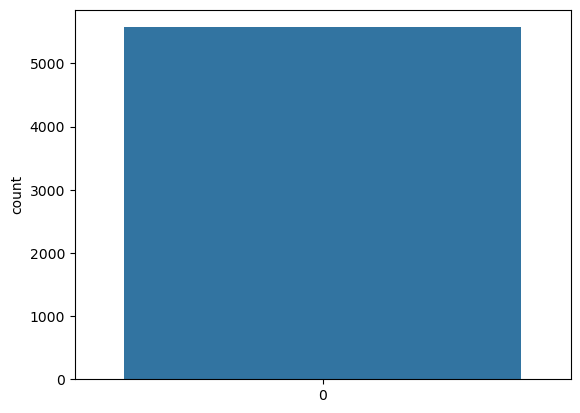

In [17]:
sns.countplot(data['spam'])
#plt.figure(figsize=(5,3))
#sns.histplot(data[data['spam'] == 0])
#sns.histplot(data[data['spam'] == 1])

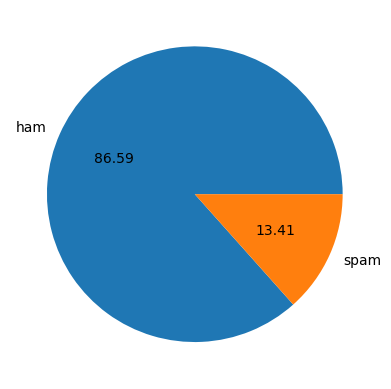

In [18]:
import matplotlib.pyplot as plt
plt.pie(data['spam'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [20]:
data.duplicated().sum()

403

In [21]:
data.drop_duplicates(inplace=True)

In [22]:
data.duplicated().sum()

0

In [23]:
data.isnull().sum()

spam    0
text    0
dtype: int64

In [24]:
data.shape

(5169, 2)

<Axes: ylabel='count'>

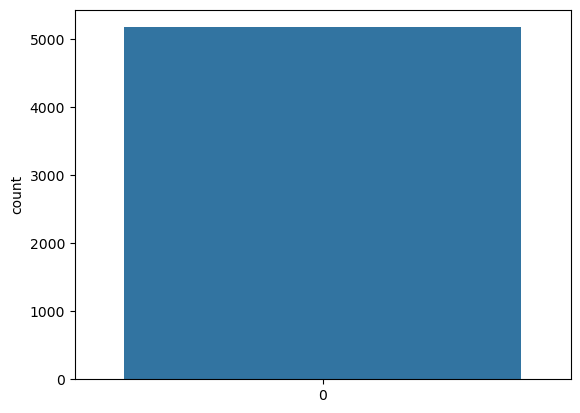

In [25]:
sns.countplot(data['spam'])

In [26]:
data['spam'].value_counts()

0    4516
1     653
Name: spam, dtype: int64

# separate in x & y

In [27]:
x = data['text'].values
y = data['spam'].values

In [28]:
y

array([0, 0, 1, ..., 0, 0, 0])

# Train-Test split

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2 , random_state= 0)

In [31]:
x_train.shape

(4135,)

In [32]:
x_test.shape

(1034,)

In [33]:
y_train.shape

(4135,)

In [34]:
y_test.shape

(1034,)

# preprocessing

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
cv = CountVectorizer()
x_train = cv.fit_transform(x_train)

In [38]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
len(x_train.toarray()[0])

7594

In [40]:
len(x_train.toarray())

4135

# Training by ML algorithm

In [41]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [42]:
nb.fit(x_train, y_train)

MultinomialNB()

In [43]:
x_test = cv.transform(x_test)

In [44]:
len(x_test.toarray())

1034

In [45]:
len(x_test.toarray()[0])

7594

In [46]:
y_pred = nb.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
print("Testing accuracy:")
accuracy_score(y_pred, y_test)

Testing accuracy:


0.9816247582205029

In [49]:
print("Testing accurcy:")
nb.score(x_train,y_train)

Testing accurcy:


0.9929866989117292

# Testing using few emails

In [50]:
email = ['you got called a tool?']

In [51]:
clean_email = cv.transform(email)

In [52]:
len(clean_email.toarray()[0])

7594

In [53]:
check = nb.predict(clean_email)[0]

In [54]:
check

0

# Evaluation

In [55]:
email = ['Dai i downloaded but there is only exe file which i can only run that exe after installing.']

clean_email = cv.transform(email)
check = nb.predict(clean_email)[0]

if check == 0:
    print("This is a Ham Email!")
else:
    print("This is a Spam Email!")

This is a Ham Email!
